In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
# !pip install pandas_profiling
import pandas_profiling as pp
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold,StratifiedKFold
from sklearn.metrics import mean_squared_error
from catboost import CatBoostRegressor
from catboost import Pool


ModuleNotFoundError: No module named 'catboost'

In [8]:
train = pd.read_csv('datasets/train_file.csv')
test = pd.read_csv('datasets/test_file.csv')
fulfilment_center = pd.read_csv('datasets/fulfilment_center_info.csv')
meal_info = pd.read_csv('datasets/meal_info.csv')

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456548 entries, 0 to 456547
Data columns (total 9 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     456548 non-null  int64  
 1   week                   456548 non-null  int64  
 2   center_id              456548 non-null  int64  
 3   meal_id                456548 non-null  int64  
 4   checkout_price         456548 non-null  float64
 5   base_price             456548 non-null  float64
 6   emailer_for_promotion  456548 non-null  int64  
 7   homepage_featured      456548 non-null  int64  
 8   num_orders             456548 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 31.3 MB


In [10]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32573 entries, 0 to 32572
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     32573 non-null  int64  
 1   week                   32573 non-null  int64  
 2   center_id              32573 non-null  int64  
 3   meal_id                32573 non-null  int64  
 4   checkout_price         32573 non-null  float64
 5   base_price             32573 non-null  float64
 6   emailer_for_promotion  32573 non-null  int64  
 7   homepage_featured      32573 non-null  int64  
dtypes: float64(2), int64(6)
memory usage: 2.0 MB


In [11]:
test.head()

id  week  center_id  meal_id  checkout_price  base_price  \
0  1028232   146         55     1885          158.11      159.11   
1  1127204   146         55     1993          160.11      159.11   
2  1212707   146         55     2539          157.14      159.14   
3  1082698   146         55     2631          162.02      162.02   
4  1400926   146         55     1248          163.93      163.93   

   emailer_for_promotion  homepage_featured  
0                      0                  0  
1                      0                  0  
2                      0                  0  
3                      0                  0  
4                      0                  0

In [12]:
fulfilment_center.head()

center_id  city_code  region_code center_type  op_area
0         11        679           56      TYPE_A      3.7
1         13        590           56      TYPE_B      6.7
2        124        590           56      TYPE_C      4.0
3         66        648           34      TYPE_A      4.1
4         94        632           34      TYPE_C      3.6

In [13]:
meal_info.head()

meal_id   category cuisine
0     1885  Beverages    Thai
1     1993  Beverages    Thai
2     2539  Beverages    Thai
3     1248  Beverages  Indian
4     2631  Beverages  Indian

In [14]:
meal_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   meal_id   51 non-null     int64 
 1   category  51 non-null     object
 2   cuisine   51 non-null     object
dtypes: int64(1), object(2)
memory usage: 1.3+ KB


In [15]:
train = pd.merge(train,fulfilment_center, on='center_id')
test = pd.merge(test,fulfilment_center, on='center_id')

train = pd.merge(train,meal_info, on='meal_id')
test = pd.merge(test,meal_info, on='meal_id')

In [16]:
train.head()

id  week  center_id  meal_id  checkout_price  base_price  \
0  1379560     1         55     1885          136.83      152.29   
1  1018704     2         55     1885          135.83      152.29   
2  1196273     3         55     1885          132.92      133.92   
3  1116527     4         55     1885          135.86      134.86   
4  1343872     5         55     1885          146.50      147.50   

   emailer_for_promotion  homepage_featured  num_orders  city_code  \
0                      0                  0         177        647   
1                      0                  0         323        647   
2                      0                  0          96        647   
3                      0                  0         163        647   
4                      0                  0         215        647   

   region_code center_type  op_area   category cuisine  
0           56      TYPE_C      2.0  Beverages    Thai  
1           56      TYPE_C      2.0  Beverages    Thai  
2           56      TYPE_C      2.0  Beverages    Thai  
3           56      TYPE_C      2.0  Beverages    Thai  
4           56      TYPE_C      2.0  Beverages    Thai

In [17]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 456548 entries, 0 to 456547
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     456548 non-null  int64  
 1   week                   456548 non-null  int64  
 2   center_id              456548 non-null  int64  
 3   meal_id                456548 non-null  int64  
 4   checkout_price         456548 non-null  float64
 5   base_price             456548 non-null  float64
 6   emailer_for_promotion  456548 non-null  int64  
 7   homepage_featured      456548 non-null  int64  
 8   num_orders             456548 non-null  int64  
 9   city_code              456548 non-null  int64  
 10  region_code            456548 non-null  int64  
 11  center_type            456548 non-null  object 
 12  op_area                456548 non-null  float64
 13  category               456548 non-null  object 
 14  cuisine                456548 non-nu

In [18]:
pp.ProfileReport(train)

#### EDA

C:\Users\Pradyumna.M\AppData\Roaming\Python\Python36\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='week', ylabel='num_orders'>

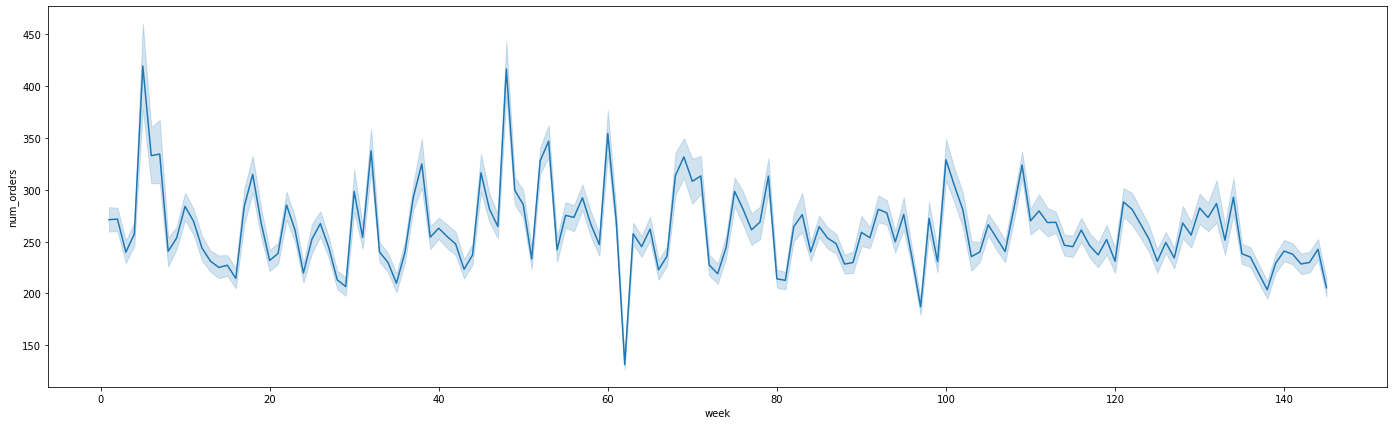

In [19]:
sns.lineplot(train['week'],train['num_orders'])

C:\Users\Pradyumna.M\AppData\Roaming\Python\Python36\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76]),
 [Text(0, 0, '10'),
  Text(1, 0, '11'),
  Text(2, 0, '13'),
  Text(3, 0, '14'),
  Text(4, 0, '17'),
  Text(5, 0, '20'),
  Text(6, 0, '23'),
  Text(7, 0, '24'),
  Text(8, 0, '26'),
  Text(9, 0, '27'),
  Text(10, 0, '29'),
  Text(11, 0, '30'),
  Text(12, 0, '32'),
  Text(13, 0, '34'),
  Text(14, 0, '36'),
  Text(15, 0, '39'),
  Text(16, 0, '41'),
  Text(17, 0, '42'),
  Text(18, 0, '43'),
  Text(19, 0, '50'),
  Text(20, 0, '51'),
  Text(21, 0, '52'),
  Text(22, 0, '53'),
  Text(23, 0, '55'),
  Text(24, 0, '57'),
  Text(25, 0, '58'),
  Text(26, 0, '59'),
  Text(27, 0, '61'),
  Text(28, 0, '64'),
  Text(29, 0, '65'),
  Text(30, 0, '66'),
  Text(31

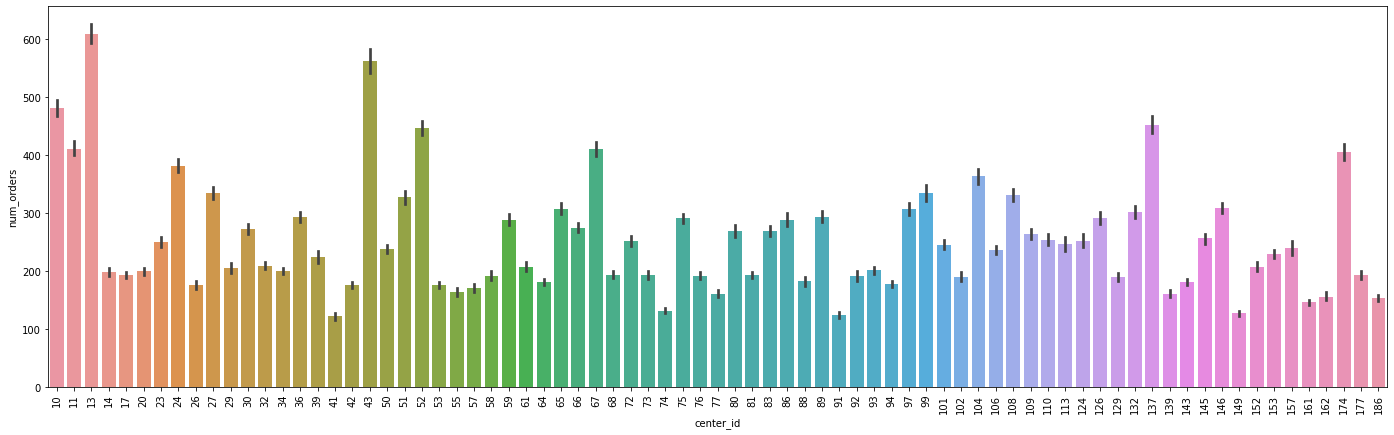

In [20]:
sns.barplot(train['center_id'],train['num_orders'])
plt.xticks(rotation=90)

In [ ]:
sns.lineplot(train['checkout_price'],train['num_orders'])

In [ ]:
sns.barplot(train['category'],train['num_orders'])
plt.xticks(rotation = '90')

In [ ]:
sns.barplot(train['cuisine'],train['num_orders'])
#plt.xticks(rotation = '90')

In [ ]:
sns.barplot(train['region_code'],train['num_orders'])
#plt.xticks(rotation = '90')

In [ ]:
sns.barplot(train['op_area'],train['num_orders'])
plt.xticks(rotation = '90')

In [ ]:
sns.lineplot(train['city_code'],train['num_orders'])
plt.xticks(rotation = '90')

In [ ]:
sns.boxplot(x='num_orders',data=train)

We need to removed outlier from num_orders 

In [ ]:
sns.boxplot(x='region_code',data=train)

In [ ]:
sns.jointplot(x='checkout_price',y='num_orders',data=train)

We have removed outlier from check_out price and base price

In [ ]:
sns.jointplot(x='op_area',y='num_orders',data=train)

In [ ]:
sns.jointplot(x='region_code',y='num_orders',data=train)

In [ ]:
sns.jointplot(x='city_code',y='num_orders',data=train)

In [ ]:
sns.boxplot(x='category',y='num_orders',data=train)
plt.xticks(rotation=90)

In [ ]:
sns.boxplot(x='cuisine',y='num_orders',data=train)
plt.xticks(rotation=90)

In [ ]:
sns.jointplot(x='center_id',y='num_orders',data=train)

In [ ]:
print("Total number of centers : ",train['center_id'].nunique())

In [ ]:
print("Total Number of cities: ",train['city_code'].nunique())

We have 77 stores in 51 cities, so some city have more than 1 center.

In [21]:
print("Total Number of cities: ",train['city_code'].nunique())

Total Number of cities:  51


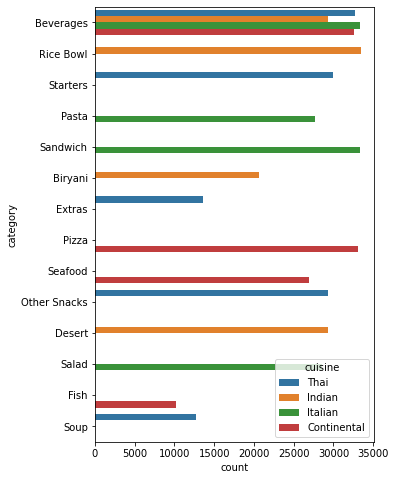

In [22]:
fig, ax = plt.subplots(figsize=(5,8))
sns.countplot(y = train['category'], hue = train['cuisine'], ax=ax)
plt.show()

In [23]:
center_meal_train = (train['center_id'].astype(str) + "_" + train['meal_id'].astype(str)).unique()
print("There are", len(center_meal_train),"center-meal pairs in train data")

There are 3597 center-meal pairs in train data


In [24]:
center_meal_test = (test['center_id'].astype(str) + "_" + test['meal_id'].astype(str)).unique()
print("There are", len(center_meal_test),"center-meal pairs in train data")

There are 3548 center-meal pairs in train data


In [25]:
# check if test set has any new center-mean pair or not
print("There are",len(set(center_meal_test) - set(center_meal_train)),"New center-meal pairs in test dataset which are not present in train dataset")
print(set(center_meal_test) - set(center_meal_train))

There are 3 New center-meal pairs in test dataset which are not present in train dataset
{'92_2104', '73_2956', '73_1571'}


In [26]:
test[(test['center_id']==73) & (test['meal_id'].isin([2956, 1571]))].shape[0]

11

In [27]:
test[(test['center_id']==92) & (test['meal_id'].isin([2104]))].shape[0]

2

There should be 77*51 = 3927 center-meal pair, but we have 3597 pairs in train data, that means some centers did not sell some of the meals.

There should be 3597*145 = 521565 records in past 145 week data, but we have 456548 records. which means some centers did not sell some meal for some week or they stared selling some new type of meal after some weeks. Same with test data.

Test set has only 3548 center-meal pair, that means some of the centers did not sell some type of meals in this 10 week.

Here in the test set (future 10 week), center 73 started selling meal 2956 & 1571, center 92 started selling meal 2104, which they have never sold in last 145 weeks. There are only 13 records with unknown center-meal pair in test set.

#### Remove outlier

In [28]:
outlier_index = train[(train['num_orders']>15000)].index

In [29]:
train.drop(outlier_index,inplace = True)

#### Feature Engineering

In [30]:
train['train_or_test'] = 'train'
test['train_or_test'] = 'test'

In [31]:
train['num_orders'] = np.log1p(train['num_orders'])

In [32]:
total_data = train.append(test).reset_index(drop=True)[train.columns]

In [33]:
total_data = total_data.sort_values(['center_id', 'meal_id', 'week']).reset_index(drop=True)

In [34]:
total_data['checkout_price'] = np.log1p(total_data['checkout_price'])
total_data['base_price'] = np.log1p(total_data['base_price'])

In [35]:
total_data['discount_on_base'] = (total_data['base_price'] - total_data['checkout_price']) / total_data['base_price']

In [36]:
total_data["discount_ratio"] = total_data["base_price"] / total_data["checkout_price"]

C:\Users\Pradyumna.M\AppData\Roaming\Python\Python36\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


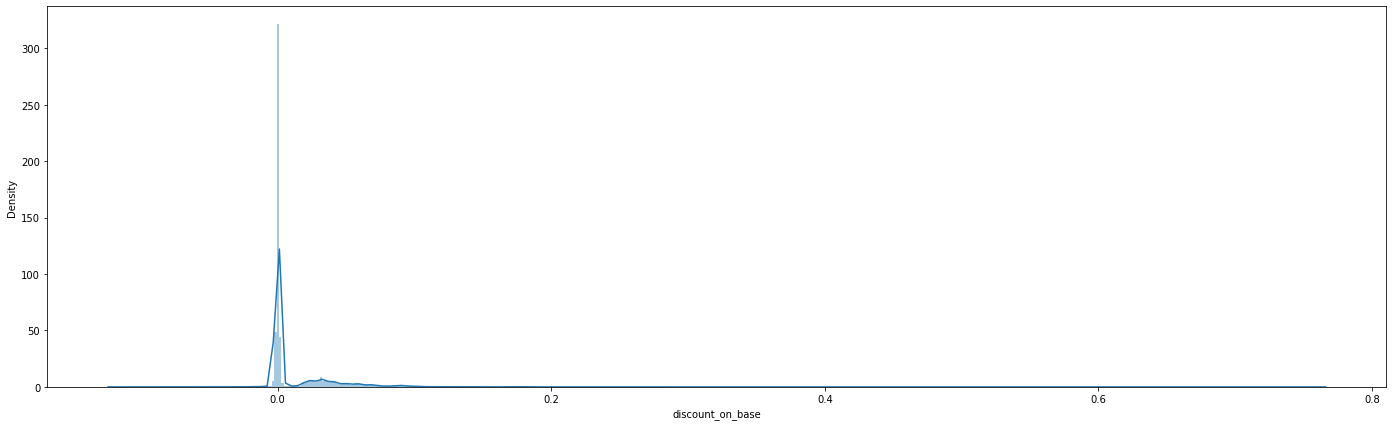

In [37]:
sns.distplot(total_data['discount_on_base'], bins=500)
plt.show()

In [38]:
total_data['price_last_curr_diff'] = (total_data['checkout_price'].shift(1) - total_data['checkout_price']).fillna(1)/ total_data['checkout_price'].shift(1).fillna(1)

In [39]:
for _, r in total_data.groupby(['center_id', 'meal_id'])['week'].first().reset_index().iterrows():
    total_data.loc[(total_data['center_id']==r['center_id']) & (total_data['meal_id']==r['meal_id']) & (total_data['week']==r['week']), 'price_last_curr_diff'] = total_data[(total_data['center_id']==r['center_id']) & (total_data['meal_id']==r['meal_id']) & (total_data['week']!=r['week'])]['price_last_curr_diff'].mean()
total_data['price_last_curr_diff'] = total_data['price_last_curr_diff'].fillna(0)

#### Some functions to create aggregated, rolling mean/median, and exponentially weighted features.

Code from : https://www.kaggle.com/abhilashawasthi/feature-engineering-lgb-model

In [40]:
# Features constructed from previous sales values

#Creating sales lag features
def create_sales_lag_feats(df, gpby_cols, target_col, lags):
    gpby = df.groupby(gpby_cols)
    for i in lags:
        df['_'.join([target_col, 'lag', str(i)])] = \
                gpby[target_col].shift(i).values + np.random.normal(scale=1.6, size=(len(df),))
    return df

# Creating sales exponentially weighted mean features
def create_sales_ewm_feats(df, gpby_cols, target_col, alpha=[0.9], shift=[1]):
    gpby = df.groupby(gpby_cols)
    for a in alpha:
        for s in shift:
            df['_'.join([target_col, 'lag', str(s), 'ewm', str(a)])] = \
                gpby[target_col].shift(s).ewm(alpha=a).mean().values
    return df

In [41]:
# Creating num_orders lag, rolling mean, rolling median, ohe features of the above train set
total_data = create_sales_lag_feats(total_data, gpby_cols=['center_id','meal_id'], target_col='num_orders', 
                               lags=[10,11, 12])

total_data = create_sales_ewm_feats(total_data, gpby_cols=['center_id','meal_id'], 
                               target_col='num_orders', 
                               alpha=[0.5], 
                               shift=[10,11,12,13,14,15])

In [42]:
total_data.head()

id  week  center_id  meal_id  checkout_price  base_price  \
0  1436842     1         10     1062        5.206147    5.206147   
1  1205013     2         10     1062        5.216890    5.211451   
2  1447751     3         10     1062        5.222300    5.211451   
3  1014968     4         10     1062        5.211451    5.216890   
4  1003563     5         10     1062        5.217053    5.206147   

   emailer_for_promotion  homepage_featured  num_orders  city_code  ...  \
0                      0                  0    6.763885        590  ...   
1                      0                  0    6.663133        590  ...   
2                      0                  0    6.747587        590  ...   
3                      0                  0    7.092574        590  ...   
4                      0                  0    6.865891        590  ...   

   price_last_curr_diff num_orders_lag_10  num_orders_lag_11  \
0              0.000086               NaN                NaN   
1             -0.002064               NaN                NaN   
2             -0.001037               NaN                NaN   
3              0.002077               NaN                NaN   
4             -0.001075               NaN                NaN   

  num_orders_lag_12 num_orders_lag_10_ewm_0.5 num_orders_lag_11_ewm_0.5  \
0               NaN                       NaN                       NaN   
1               NaN                       NaN                       NaN   
2               NaN                       NaN                       NaN   
3               NaN                       NaN                       NaN   
4               NaN                       NaN                       NaN   

   num_orders_lag_12_ewm_0.5  num_orders_lag_13_ewm_0.5  \
0                        NaN                        NaN   
1                        NaN                        NaN   
2                        NaN                        NaN   
3                        NaN                        NaN   
4                        NaN                        NaN   

   num_orders_lag_14_ewm_0.5  num_orders_lag_15_ewm_0.5  
0                        NaN                        NaN  
1                        NaN                        NaN  
2                        NaN                        NaN  
3                        NaN                        NaN  
4                        NaN                        NaN  

[5 rows x 28 columns]

In [43]:
### Center count features ###
gdf = total_data.groupby(["center_id", "week"])["id"].agg(['size']).reset_index()
gdf.columns = ["center_id", "week", "center_week_count"]
total_data = pd.merge(total_data,gdf, on=["center_id", "week"], how="left")

gdf = total_data.groupby(["center_id", "category"])["id"].count().reset_index()
gdf.columns = ["center_id", "category", "center_cat_count"]
total_data = pd.merge(total_data,gdf, on=["center_id", "category"], how="left")

gdf = total_data.groupby(["center_id", "category", "week"])["id"].count().reset_index()
gdf.columns = ["center_id", "category", "week", "center_cat_week_count"]
total_data = pd.merge(total_data,gdf, on=["center_id", "category", "week"], how="left")

gdf = total_data.groupby(["center_id", "cuisine"])["id"].count().reset_index()
gdf.columns = ["center_id", "cuisine", "center_cui_count"]
total_data = pd.merge(total_data,gdf, on=["center_id", "cuisine"], how="left")

In [44]:
### Meal count features ###
gdf = total_data.groupby(["meal_id"])["id"].count().reset_index()
gdf.columns = ["meal_id", "meal_count"]
total_data = pd.merge(total_data,gdf, on=["meal_id"], how="left")

gdf = total_data.groupby(["region_code", "meal_id"])["id"].count().reset_index()
gdf.columns = ["region_code", "meal_id", "region_meal_count"]
total_data= pd.merge(total_data,gdf, on=["region_code", "meal_id"], how="left")

gdf = total_data.groupby(["meal_id", "week"])["id"].count().reset_index()
gdf.columns = ["meal_id", "week", "meal_week_count"]
total_data = pd.merge(total_data,gdf, on=["meal_id", "week"], how="left")

gdf =total_data.groupby(["center_type", "meal_id", "week"])["id"].count().reset_index()
gdf.columns = ["center_type", "meal_id", "week", "type_meal_week_count"]
total_data = pd.merge(total_data,gdf, on=["center_type", "meal_id", "week"], how="left")

gdf = total_data.groupby(["region_code", "meal_id", "week"])["id"].count().reset_index()
gdf.columns = ["region_code", "meal_id", "week", "region_meal_week_count"]
total_data = pd.merge(total_data,gdf, on=["region_code", "meal_id", "week"], how="left")

gdf =total_data.groupby(["city_code", "meal_id", "week"])["id"].count().reset_index()
gdf.columns = ["city_code", "meal_id", "week", "city_meal_week_count"]
total_data = pd.merge(total_data,gdf, on=["city_code", "meal_id", "week"], how="left")

In [45]:
### Price rank ###
total_data["meal_price_rank"] = total_data.groupby("meal_id")["checkout_price"].rank()
total_data["meal_city_price_rank"] =total_data.groupby(["meal_id", "city_code"])["checkout_price"].rank()
total_data["meal_region_price_rank"] = total_data.groupby(["meal_id", "region_code"])["checkout_price"].rank()
total_data["meal_week_price_rank"] = total_data.groupby(["meal_id", "week"])["checkout_price"].rank()

total_data["center_price_rank"] = total_data.groupby("center_id")["checkout_price"].rank()
total_data["center_week_price_rank"] = total_data.groupby(["center_id", "week"])["checkout_price"].rank()
total_data["center_cat_price_rank"] = total_data.groupby(["center_id", "category"])["checkout_price"].rank()

In [46]:
### Week features ###
gdf = total_data.groupby(["meal_id"])["checkout_price"].agg(["min", "max", "mean", "std"]).reset_index()
gdf.columns = ["meal_id", "meal_price_min", "meal_price_max", "meal_price_mean", "meal_price_std"]
total_data = pd.merge(total_data,gdf, on=["meal_id"], how="left")

gdf = total_data.groupby(["meal_id"])["base_price"].agg(["min", "max", "mean", "std"]).reset_index()
gdf.columns = ["meal_id", "disc_price_min", "disc_price_max", "disc_price_mean", "disc_price_std"]
total_data = pd.merge(total_data,gdf, on=["meal_id"], how="left")

gdf = total_data.groupby(["city_code","meal_id", "week"])["checkout_price"].agg(["min", "max", "mean", "std"]).reset_index()
gdf.columns = ["city_code", "meal_id", "week", "meal_price2_min", "meal_price2_max", "meal_price2_mean", "meal_price2_std"]
total_data= pd.merge(total_data,gdf, on=["city_code", "meal_id", "week"], how="left")

gdf = total_data.groupby(["city_code", "category"])["checkout_price"].agg(["mean", "std"]).reset_index()
gdf.columns = ["city_code", "category", "meal_price3_mean", "meal_price3_std"]
total_datal = pd.merge(total_data,gdf, on=["city_code", "category"], how="left")

In [47]:
total_data['center_id'] = total_data['center_id'].astype(np.object)
total_data['meal_id'] = total_data['meal_id'].astype(np.object)
total_data['region_code'] = total_data['region_code'].astype(np.object)
total_datal['city_code'] = total_data['city_code'].astype(np.object)

In [48]:
train_data = total_data.loc[total_data['train_or_test']=='train', :]
test_data = total_data.loc[total_data['train_or_test']=='test', :]

In [49]:
center_meal_mean = train_data.groupby(['center_id','meal_id'])['num_orders'].mean()
center_meal_mean = center_meal_mean.reset_index()
center_meal_mean = center_meal_mean.rename(columns={'num_orders':'avg_orders'})
train_data = pd.merge(train_data,center_meal_mean, how='left', left_on=['center_id','meal_id'], right_on = ['center_id','meal_id'])
test_data = pd.merge(test_data,center_meal_mean, how='left', left_on=['center_id','meal_id'], right_on = ['center_id','meal_id'])
center_mean = train_data.groupby('center_id')['num_orders'].mean()
center_mean = center_mean.reset_index()
center_mean = center_mean.rename(columns={'num_orders':'avg_center'})
train_data = pd.merge(train_data,center_mean, how='left', left_on=['center_id'], right_on = ['center_id'])
test_data = pd.merge(test_data,center_mean, how='left', left_on=['center_id'], right_on = ['center_id'])
meal_mean = train_data.groupby('meal_id')['num_orders'].mean()
meal_mean = meal_mean.reset_index()
meal_mean = meal_mean.rename(columns={'num_orders':'avg_meal'})
train_data = pd.merge(train_data, meal_mean,how='left',left_on=['meal_id'], right_on = ['meal_id'])
test_data = pd.merge(test_data, meal_mean,how='left',left_on=['meal_id'], right_on = ['meal_id'])

In [50]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 456546 entries, 0 to 456545
Data columns (total 60 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   id                         456546 non-null  int64  
 1   week                       456546 non-null  int64  
 2   center_id                  456546 non-null  object 
 3   meal_id                    456546 non-null  object 
 4   checkout_price             456546 non-null  float64
 5   base_price                 456546 non-null  float64
 6   emailer_for_promotion      456546 non-null  int64  
 7   homepage_featured          456546 non-null  int64  
 8   num_orders                 456546 non-null  float64
 9   city_code                  456546 non-null  int64  
 10  region_code                456546 non-null  object 
 11  center_type                456546 non-null  object 
 12  op_area                    456546 non-null  float64
 13  category                   45

In [51]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32573 entries, 0 to 32572
Data columns (total 60 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         32573 non-null  int64  
 1   week                       32573 non-null  int64  
 2   center_id                  32573 non-null  object 
 3   meal_id                    32573 non-null  object 
 4   checkout_price             32573 non-null  float64
 5   base_price                 32573 non-null  float64
 6   emailer_for_promotion      32573 non-null  int64  
 7   homepage_featured          32573 non-null  int64  
 8   num_orders                 0 non-null      float64
 9   city_code                  32573 non-null  int64  
 10  region_code                32573 non-null  object 
 11  center_type                32573 non-null  object 
 12  op_area                    32573 non-null  float64
 13  category                   32573 non-null  obj

### Catboost Model

In [52]:
avoid_column = ['id', 'num_orders', 'train_or_test']

In [53]:
features = [col for col in test_data.columns if col not in avoid_column]

In [54]:
features

['week',
 'center_id',
 'meal_id',
 'checkout_price',
 'base_price',
 'emailer_for_promotion',
 'homepage_featured',
 'city_code',
 'region_code',
 'center_type',
 'op_area',
 'category',
 'cuisine',
 'discount_on_base',
 'discount_ratio',
 'price_last_curr_diff',
 'num_orders_lag_10',
 'num_orders_lag_11',
 'num_orders_lag_12',
 'num_orders_lag_10_ewm_0.5',
 'num_orders_lag_11_ewm_0.5',
 'num_orders_lag_12_ewm_0.5',
 'num_orders_lag_13_ewm_0.5',
 'num_orders_lag_14_ewm_0.5',
 'num_orders_lag_15_ewm_0.5',
 'center_week_count',
 'center_cat_count',
 'center_cat_week_count',
 'center_cui_count',
 'meal_count',
 'region_meal_count',
 'meal_week_count',
 'type_meal_week_count',
 'region_meal_week_count',
 'city_meal_week_count',
 'meal_price_rank',
 'meal_city_price_rank',
 'meal_region_price_rank',
 'meal_week_price_rank',
 'center_price_rank',
 'center_week_price_rank',
 'center_cat_price_rank',
 'meal_price_min',
 'meal_price_max',
 'meal_price_mean',
 'meal_price_std',
 'disc_price_min

In [55]:
categorical_features_indices = np.where(train_data[features].dtypes =='object')[0]
categorical_features_indices

array([ 1,  2,  8,  9, 11, 12], dtype=int64)

In [58]:
!pip install catboost
from catboost import CatBoostRegressor
model = CatBoostRegressor(
    iterations=2000, 
    learning_rate=0.02, 
    max_depth=8, 
    l2_leaf_reg=10, 
    loss_function='RMSE',
    random_seed=2019,
    od_type='Iter',
    od_wait=25,
    verbose=100,
    use_best_model=True
    )

Defaulting to user installation because normal site-packages is not writeable
Processing c:\users\pradyumna.m\appdata\local\pip\cache\wheels\ac\cb\8a\b27bf6323e2f4c462dcbf77d70b7c5e7868a7fbe12871770cf\retrying-1.3.3-py3-none-any.whl


Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


In [59]:
errcb=[]
y_pred_test=[]

fold = KFold(n_splits=5,shuffle=True,random_state=2019)

for train_index, test_index in fold.split(train_data[features],train_data['num_orders']):
    X_train, X_valid =train_data[features].iloc[train_index], train_data[features].iloc[test_index]
    y_train, y_valid = train_data['num_orders'][train_index],train_data['num_orders'][test_index]
    model.fit(X_train,y_train,
              cat_features = categorical_features_indices,
              eval_set=(X_valid,y_valid),
              early_stopping_rounds=300,
              verbose=100)
    preds = model.predict(X_valid)
    print("err: ",np.sqrt(mean_squared_error(y_valid,preds)))
    errcb.append(np.sqrt(mean_squared_error(y_valid,preds)))
    p = model.predict(test_data[features])
    y_pred_test.append(p)

0:	learn: 1.1851680	test: 1.1844310	best: 1.1844310 (0)	total: 664ms	remaining: 22m 7s
100:	learn: 0.5387991	test: 0.5404207	best: 0.5404207 (100)	total: 46s	remaining: 14m 24s
200:	learn: 0.4973122	test: 0.4994314	best: 0.4994314 (200)	total: 1m 29s	remaining: 13m 21s
300:	learn: 0.4867369	test: 0.4892503	best: 0.4892503 (300)	total: 2m 12s	remaining: 12m 28s
400:	learn: 0.4802713	test: 0.4832143	best: 0.4832143 (400)	total: 3m 1s	remaining: 12m 4s
500:	learn: 0.4755832	test: 0.4789338	best: 0.4789338 (500)	total: 3m 51s	remaining: 11m 33s
600:	learn: 0.4718114	test: 0.4755611	best: 0.4755611 (600)	total: 4m 40s	remaining: 10m 52s
700:	learn: 0.4683587	test: 0.4724729	best: 0.4724729 (700)	total: 5m 31s	remaining: 10m 13s
800:	learn: 0.4654483	test: 0.4699326	best: 0.4699326 (800)	total: 6m 27s	remaining: 9m 40s
900:	learn: 0.4629385	test: 0.4677673	best: 0.4677673 (900)	total: 7m 18s	remaining: 8m 54s
1000:	learn: 0.4609633	test: 0.4661292	best: 0.4661292 (1000)	total: 8m 7s	remainin

200:	learn: 0.4981312	test: 0.4969194	best: 0.4969194 (200)	total: 1m 45s	remaining: 15m 48s
300:	learn: 0.4875114	test: 0.4867247	best: 0.4867247 (300)	total: 2m 36s	remaining: 14m 45s
400:	learn: 0.4809854	test: 0.4805924	best: 0.4805924 (400)	total: 3m 27s	remaining: 13m 48s
500:	learn: 0.4761042	test: 0.4761189	best: 0.4761189 (500)	total: 4m 20s	remaining: 13m
600:	learn: 0.4722861	test: 0.4726203	best: 0.4726203 (600)	total: 5m 12s	remaining: 12m 7s
700:	learn: 0.4690879	test: 0.4696797	best: 0.4696797 (700)	total: 6m 4s	remaining: 11m 14s
800:	learn: 0.4667268	test: 0.4675866	best: 0.4675866 (800)	total: 6m 54s	remaining: 10m 19s
900:	learn: 0.4648519	test: 0.4659529	best: 0.4659529 (900)	total: 7m 43s	remaining: 9m 25s
1000:	learn: 0.4631108	test: 0.4644873	best: 0.4644873 (1000)	total: 8m 33s	remaining: 8m 32s
1100:	learn: 0.4613419	test: 0.4629971	best: 0.4629971 (1100)	total: 9m 21s	remaining: 7m 38s
1200:	learn: 0.4598192	test: 0.4617136	best: 0.4617136 (1200)	total: 10m 9s

In [66]:
model.fit(X=train_data[features], y=train_data['num_orders'], eval_set=(train_data[features],train_data['num_orders']), cat_features=categorical_features_indices, verbose=100)

0:	learn: 1.1848244	test: 1.1848244	best: 1.1848244 (0)	total: 510ms	remaining: 16m 58s
100:	learn: 0.5388769	test: 0.5388770	best: 0.5388770 (100)	total: 1m 7s	remaining: 21m 6s
200:	learn: 0.4977725	test: 0.4977686	best: 0.4977686 (200)	total: 2m 10s	remaining: 19m 27s
300:	learn: 0.4872840	test: 0.4872778	best: 0.4872778 (300)	total: 3m 15s	remaining: 18m 20s
400:	learn: 0.4806840	test: 0.4806766	best: 0.4806766 (400)	total: 4m 23s	remaining: 17m 30s
500:	learn: 0.4758548	test: 0.4758459	best: 0.4758459 (500)	total: 5m 38s	remaining: 16m 52s
600:	learn: 0.4721357	test: 0.4721286	best: 0.4721286 (600)	total: 6m 51s	remaining: 15m 59s
700:	learn: 0.4689775	test: 0.4689713	best: 0.4689713 (700)	total: 8m 8s	remaining: 15m 5s
800:	learn: 0.4662613	test: 0.4662557	best: 0.4662557 (800)	total: 9m 23s	remaining: 14m 2s
900:	learn: 0.4638234	test: 0.4638180	best: 0.4638180 (900)	total: 10m 33s	remaining: 12m 52s
1000:	learn: 0.4619303	test: 0.4619253	best: 0.4619253 (1000)	total: 11m 41s	re

In [67]:
pred = model.predict(test_data[features])
print(pred)

[6.9274994  6.95700526 6.92411688 ... 2.93982005 2.98985635 3.05624951]


In [68]:
pred = (np.exp(pred) - 1)

In [69]:
submission = pd.DataFrame({'id':test['id'],'num_orders':pred})
submission = submission[['id','num_orders']]
submission.head()

id   num_orders
0  1028232  1018.940325
1  1262649  1049.482919
2  1453211  1015.496185
3  1262599   800.429792
4  1495848  1028.310537

In [70]:
submission.to_csv('catboost_1.csv', index=False)

In [72]:
# from catboost import Pool
feature_score = pd.DataFrame(list(zip(train_data[features].dtypes.index, model.get_feature_importance(Pool(train_data[features], label=train_data['num_orders'], cat_features=categorical_features_indices)))),
                columns=['Feature','Score'])

feature_score = feature_score.sort_values(by='Score', ascending=False, inplace=False, kind='quicksort', na_position='last')

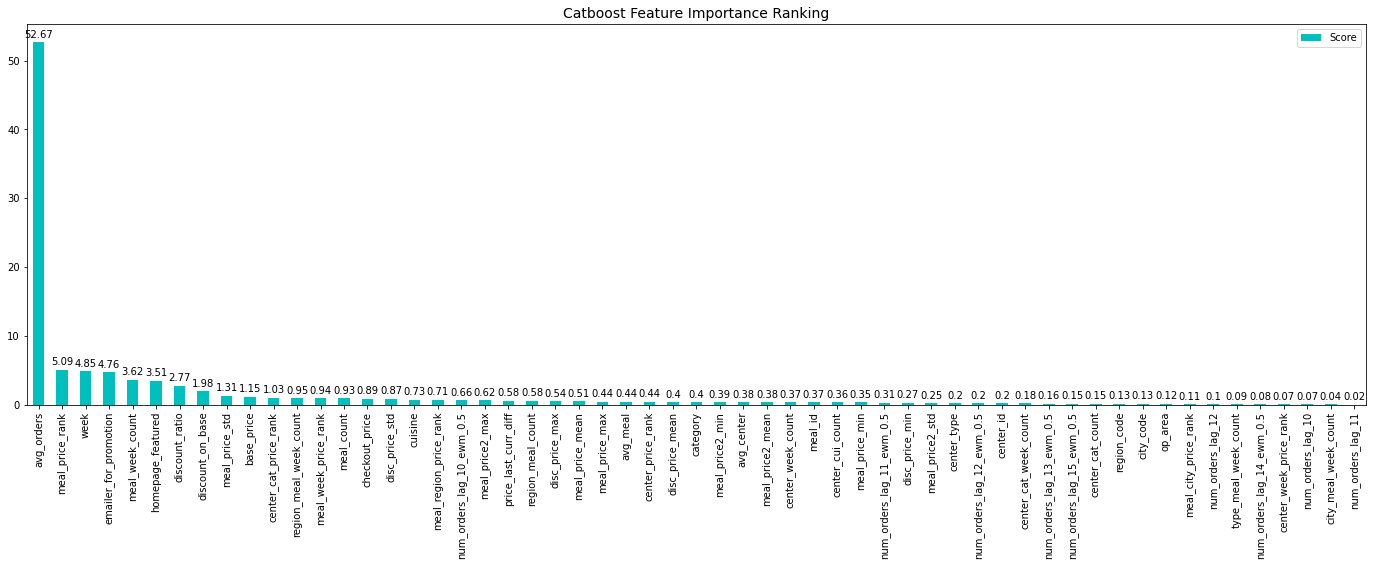

In [73]:
plt.rcParams["figure.figsize"] = (24,7)
ax = feature_score.plot('Feature', 'Score', kind='bar', color='c')
ax.set_title("Catboost Feature Importance Ranking", fontsize = 14)
ax.set_xlabel('')

rects = ax.patches

labels = feature_score['Score'].round(2)

for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 0.35, label, ha='center', va='bottom')

plt.show()